In [2]:
import pandas as pd
import numpy as np
import os
import cartopy.crs as ccrs

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Torsvik-etal-2012_dataset.csv')
df = df.fillna(0)
df.to_csv('Torsvik.csv', encoding="utf-8", na_rep='NULL', index=False)

In [3]:
df.RLat.fillna(df.Lat, inplace=True)
df.RLon.fillna(df.Lon, inplace=True)
df.head()

,Q,a95,Plate,Plate_code,Lat,Lon,CLat,CLon,RLat,RLon,Eplat,Eplong,Epang,Age
0,5,4.8,north_america,101,-86.3,5.7,NaN,NaN,-86.3,5.7,NaN,NaN,NaN,0.5
1,5,9.1,north_america,101,-86.4,8.4,NaN,NaN,-86.4,9.2,79.2,23.0,0.2,0.8
2,5,7.1,north_america,101,-85.3,265.9,NaN,NaN,-85.3,-94.1,79.9,22.7,0.3,1.0
3,5,8.7,north_america,101,-88.4,225.5,NaN,NaN,-88.4,-135.7,79.9,22.7,0.3,1.0
4,5,4.3,north_america,101,-88.9,285.0,NaN,NaN,-88.9,-75.1,79.9,22.7,0.3,1.0


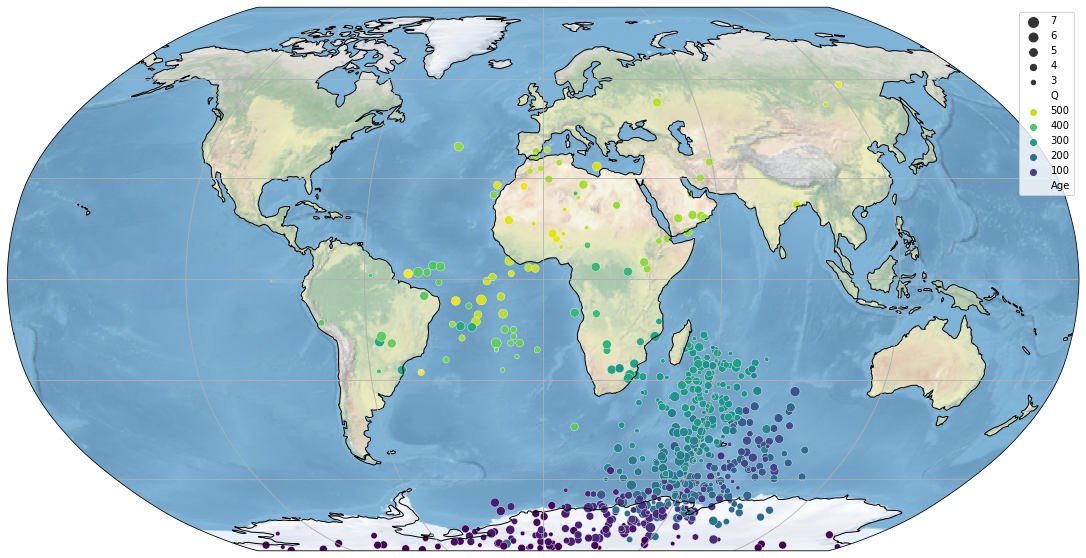

In [4]:
fig = plt.figure(figsize=(20,10))

proj = ccrs.Robinson()

ax = plt.axes(projection=proj)    
ax.coastlines()
ax.stock_img()
ax.gridlines()


sns.scatterplot(x = df['RLon'].dropna(), y = df['RLat'].dropna(),
                hue = df['Age'],  size = df['Q'], sizes=(20, 100),
                palette="viridis",
                transform = ccrs.PlateCarree())

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels))
plt.show()

#### Selecting subsets
 - e.g. Poles younger than 150 Ma from North America's database

In [73]:
df[(df['Plate'] == 'north_america') & (df['Age'] < 150)]

,Q,?95,Plate,Plate_code,Com,Formation,Lat,Lon,CLat,CLon,RLat,RLon,Eplat,Eplong,Epang,Unnamed: 15,Unnamed: 16,Age,GPDB RefNo/Reference
0,5,4.8,north_america,101,NaN,USGS SW North America composite,-86.3,5.7,NaN,NaN,-86.3,5.7,NaN,NaN,NaN,NaN,NaN,0.5,Mankinen (2008)
1,5,9.1,north_america,101,NaN,Michoacan Guanajuato volcanic field,-86.4,8.4,NaN,NaN,-86.4,9.2,79.2,23.0,0.2,NaN,NaN,0.8,Maciel Peña et al. (2009)
2,5,7.1,north_america,101,NaN,Tequila volcanic fields,-85.3,265.9,NaN,NaN,-85.3,-94.1,79.9,22.7,0.3,NaN,NaN,1.0,Ceja et al. (2006)
3,5,8.7,north_america,101,NaN,Meseta Lago Buenos Aires,-88.4,225.5,NaN,NaN,-88.4,-135.7,79.9,22.7,0.3,NaN,NaN,1.0,Brown et al. (2004)
4,5,4.3,north_america,101,NaN,Trans Mexican Volcanic Belt,-88.9,285.0,NaN,NaN,-88.9,-75.1,79.9,22.7,0.3,NaN,NaN,1.0,"Ruiz-Martínez et al., 2010"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,5,3.3,north_america,101,NaN,White Mountains igneous complex,-71.3,7.5,NaN,NaN,-51.5,77.6,65.7,-19.8,55.3,NaN,NaN,122.0,"2644, T"
64,5,7.5,north_america,101,NaN,Lebanon diorite,-71.0,16.9,NaN,NaN,-49.4,83.7,65.4,-18.9,56.8,NaN,NaN,125.0,"3036, T"
65,5,3.6,north_america,101,NaN,Notre Dame Bay dikes,-67.2,30.8,NaN,NaN,-43.6,91.6,64.9,-17.7,58.7,NaN,NaN,129.0,"1854, T"
66,7,2.6,north_america,101,NaN,Kimberlite dikes,-58.0,23.1,NaN,NaN,-33.4,89.2,64.9,-16.7,63.2,NaN,NaN,144.0,"2717, T"
